In [8]:
import numpy as np
import torch
import importlib
import timeit

import warnings
import matplotlib.pylab as plt
from pylightcurve_torch import TransitModule

plt.rcParams['figure.figsize'] = 11,5
plt.rcParams['axes.labelsize'] = 15

In [9]:
pars =  {'e':0.01, 'i':90., 'w':0., 'rp': 0.05, 'method': 'linear', 'ldc': [0.1], 
             'P': 4., 't0': 5., 'a': 5., 'fp': 0.0001}

map_dict = lambda d, f: {k: (f(v) if k!= 'method' else v) for k, v in d.items()}
get_pars = lambda n: map_dict(pars, lambda x: np.array(x)[None, None].repeat(n))

# Batch size

In [11]:
import timeit

T = 1000
tm = TransitModule(torch.linspace(5,7,T))

n_vect = [1, 10, 20, 40]
number = 1
times = []
for n in n_vect:
    tm.reset_params()
    tm.set_params(**get_pars(n))
    times += [timeit.timeit(tm, number=number) / number]

print(times)

[0.006231619999994109, 0.008359552999991138, 0.013036899999974594, 0.018689956000002894]


Text(0, 0.5, 'Exec time [s]')

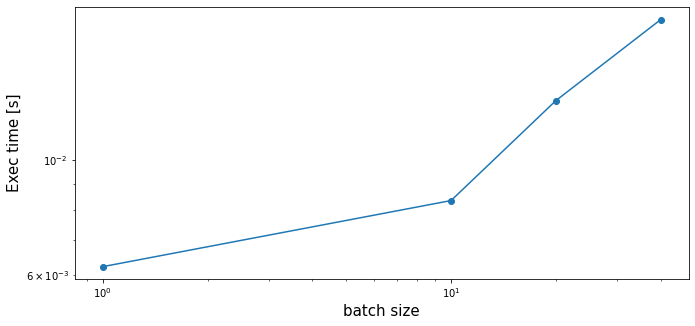

In [13]:
plt.plot(n_vect, times)
plt.scatter(n_vect, times)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('batch size')
plt.ylabel('Exec time [s]')

# Transit duration

In [15]:

P_vect = np.arange(2, 20, 3)
number = 10
batch_size = 32
times = []
durations = []

tm = TransitModule()
tm.set_time(torch.linspace(4,6,1000))
for P in P_vect:
    tm.reset_params()
    tm.set_params(**get_pars(batch_size))
    tm.set_param('P', P)
    durations += [tm.duration[0]]
    times += [timeit.timeit(lambda :tm(), 
                            number=number)/number]

Text(0, 0.5, 'Exec time [s]')

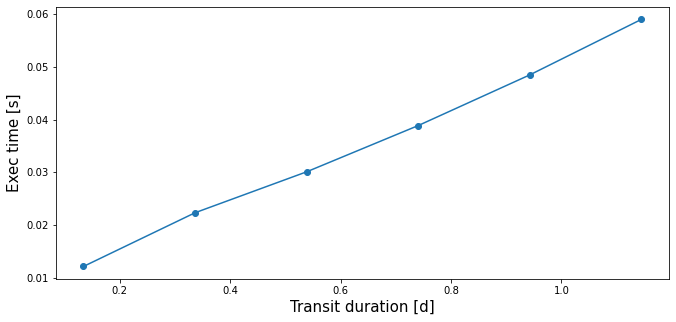

In [16]:
plt.plot(durations, times)
plt.scatter(durations, times)
plt.xlabel('Transit duration [d]')
plt.ylabel('Exec time [s]')

# Time vector length

In [19]:

number = 1
batch_size = 4
T_vect = 10**torch.arange(6)

times = []
durations = []
tm = TransitModule()
for T in T_vect:
    tm.reset_time()
    tm.set_time(torch.linspace(4,6,T))
    tm.reset_params()
    tm.set_params(**get_pars(batch_size))
    times += [timeit.timeit(lambda :tm(), 
                            number=number)/number]

Text(0.5, 0, 'Time vector length')

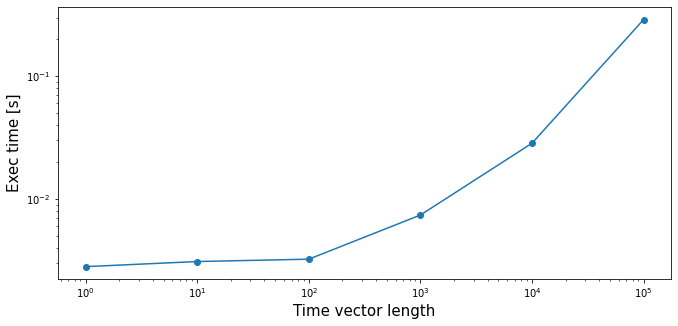

In [20]:
plt.plot(T_vect, times)
plt.scatter(T_vect, times)
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Exec time [s]')
plt.xlabel('Time vector length')